<h1 style="text-align: center;"><b>Predictive Modeling of Customer Churn Using ML Algorithms and Feature Engineering</b></h1>


### 1. Importing Essential Libraries
To proceed with the analysis, we need to import the essential libraries. These libraries provide the necessary tools and functions to manipulate, visualize, and analyze the dataset effectively. The following libraries will be imported for this purpose.

In [56]:
import pandas as pd
import numpy as np

### 📂 2. Data Loading

#### Load datasets

In [57]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Display shape and preview 

In [58]:
data.shape

(7043, 21)

###  3. Data Preprocessing

Handle missing values

Encode categorical variables (LabelEncoding / OneHotEncoding)

Convert data types

Drop unnecessary columns

In [59]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [60]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = "coerce")

In [61]:
print(data["Churn"].unique())


['No' 'Yes']


In [62]:
data["Churn"] = data["Churn"].str.strip()  # remove extra spaces
data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

In [63]:
data.dtypes
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [64]:

print(data["SeniorCitizen"].unique())
data["SeniorCitizen"].value_counts()
print(data['gender'].value_counts())

[0 1]
gender
Male      3555
Female    3488
Name: count, dtype: int64


In [65]:
data.drop("customerID", axis = 1, inplace = True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [66]:

# Fill with median (or mean)
data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14860\3034667135.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)


In [67]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [68]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [69]:
categorical_cols = data.select_dtypes(include =[ "object", "category"]).columns.tolist()
categorical_cols
numerical_cols = data.select_dtypes(include = ["int64", "float64"]).columns.tolist()

if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [70]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [71]:
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

### 📊 4. Exploratory Data Analysis (EDA)

#### Categorical Data - Count Plot

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

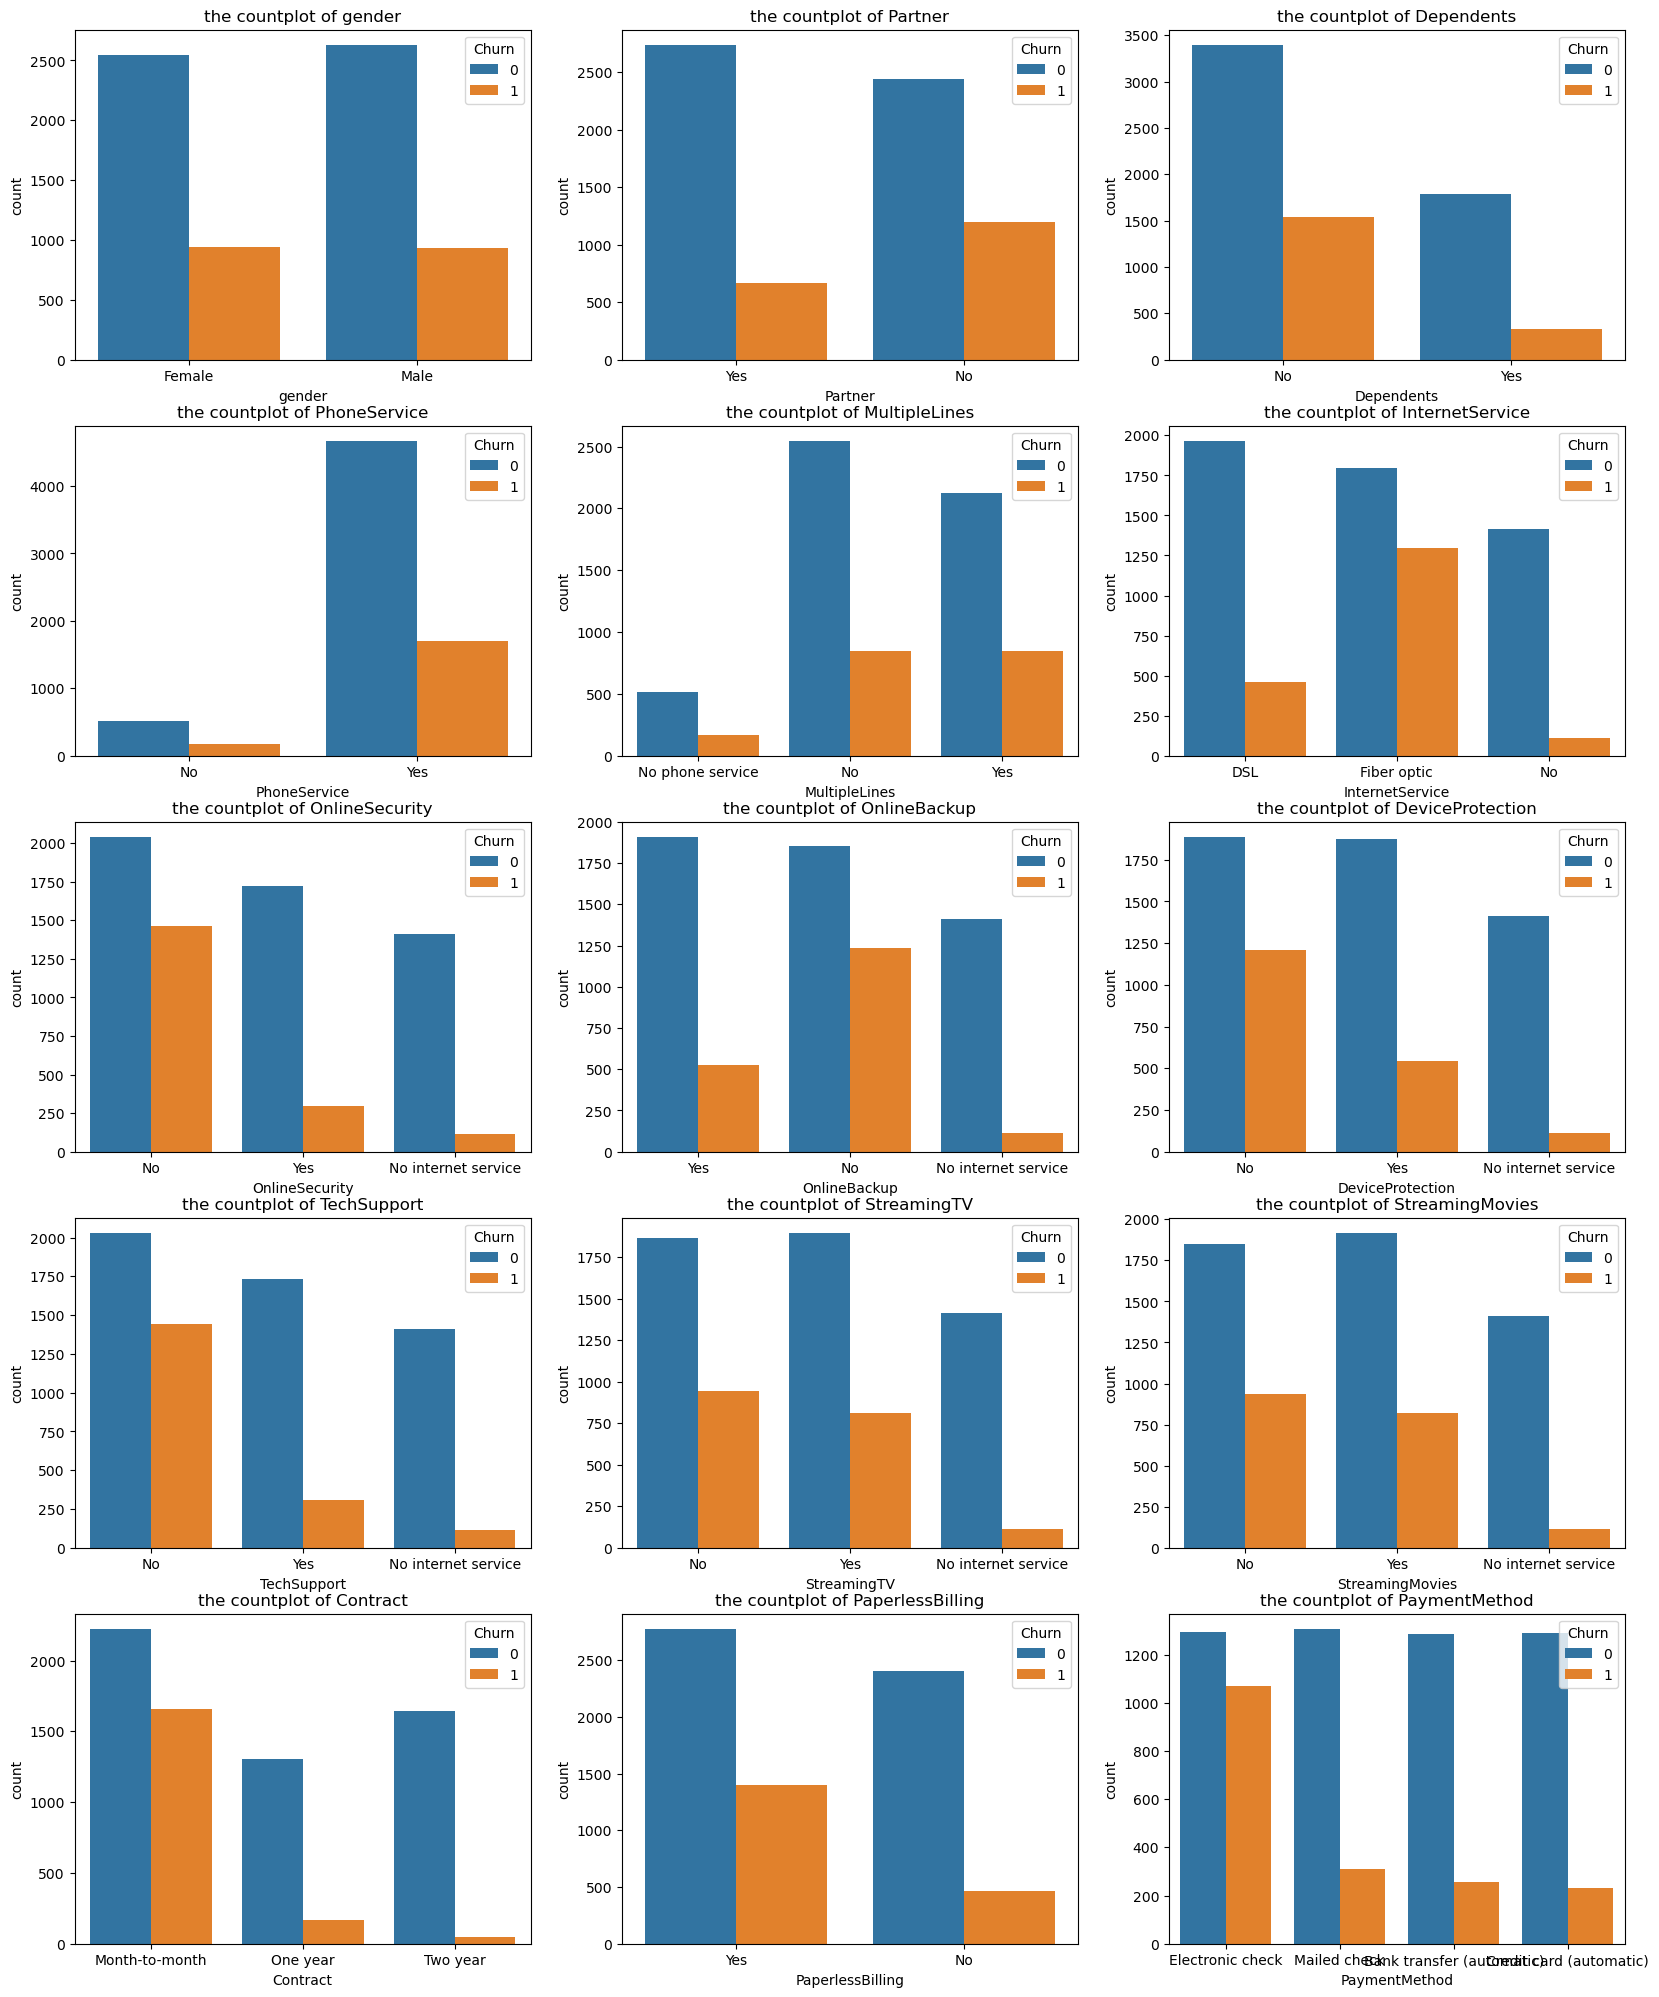

In [73]:
plt.figure(figsize = (20, 30))
for i, cols in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data = data, x = cols, hue = "Churn")
    plt.title(f"the countplot of {cols}")
plt.show()

#### Countplot of Each Categorical Data

<Axes: xlabel='Partner', ylabel='count'>

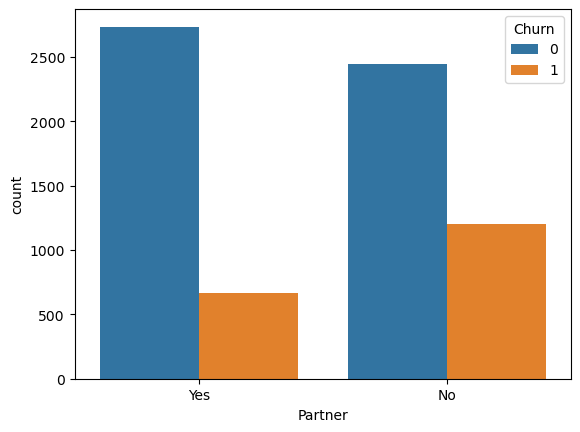

In [74]:
categorical_cols
sns.countplot(data = data, x = "Partner", hue = "Churn")

#####  Customers without partners have a higher churn rate than those with partners.

### Numerical Data

##### Bar Plot  - comparing a categorical variable (x-axis) with a numerical variable (y-axis)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14860\2551152416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Churn', y=col, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14860\2551152416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Churn', y=col, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14860\2551152416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Churn', y=col, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14860\2551152416.py:5: FutureWarn

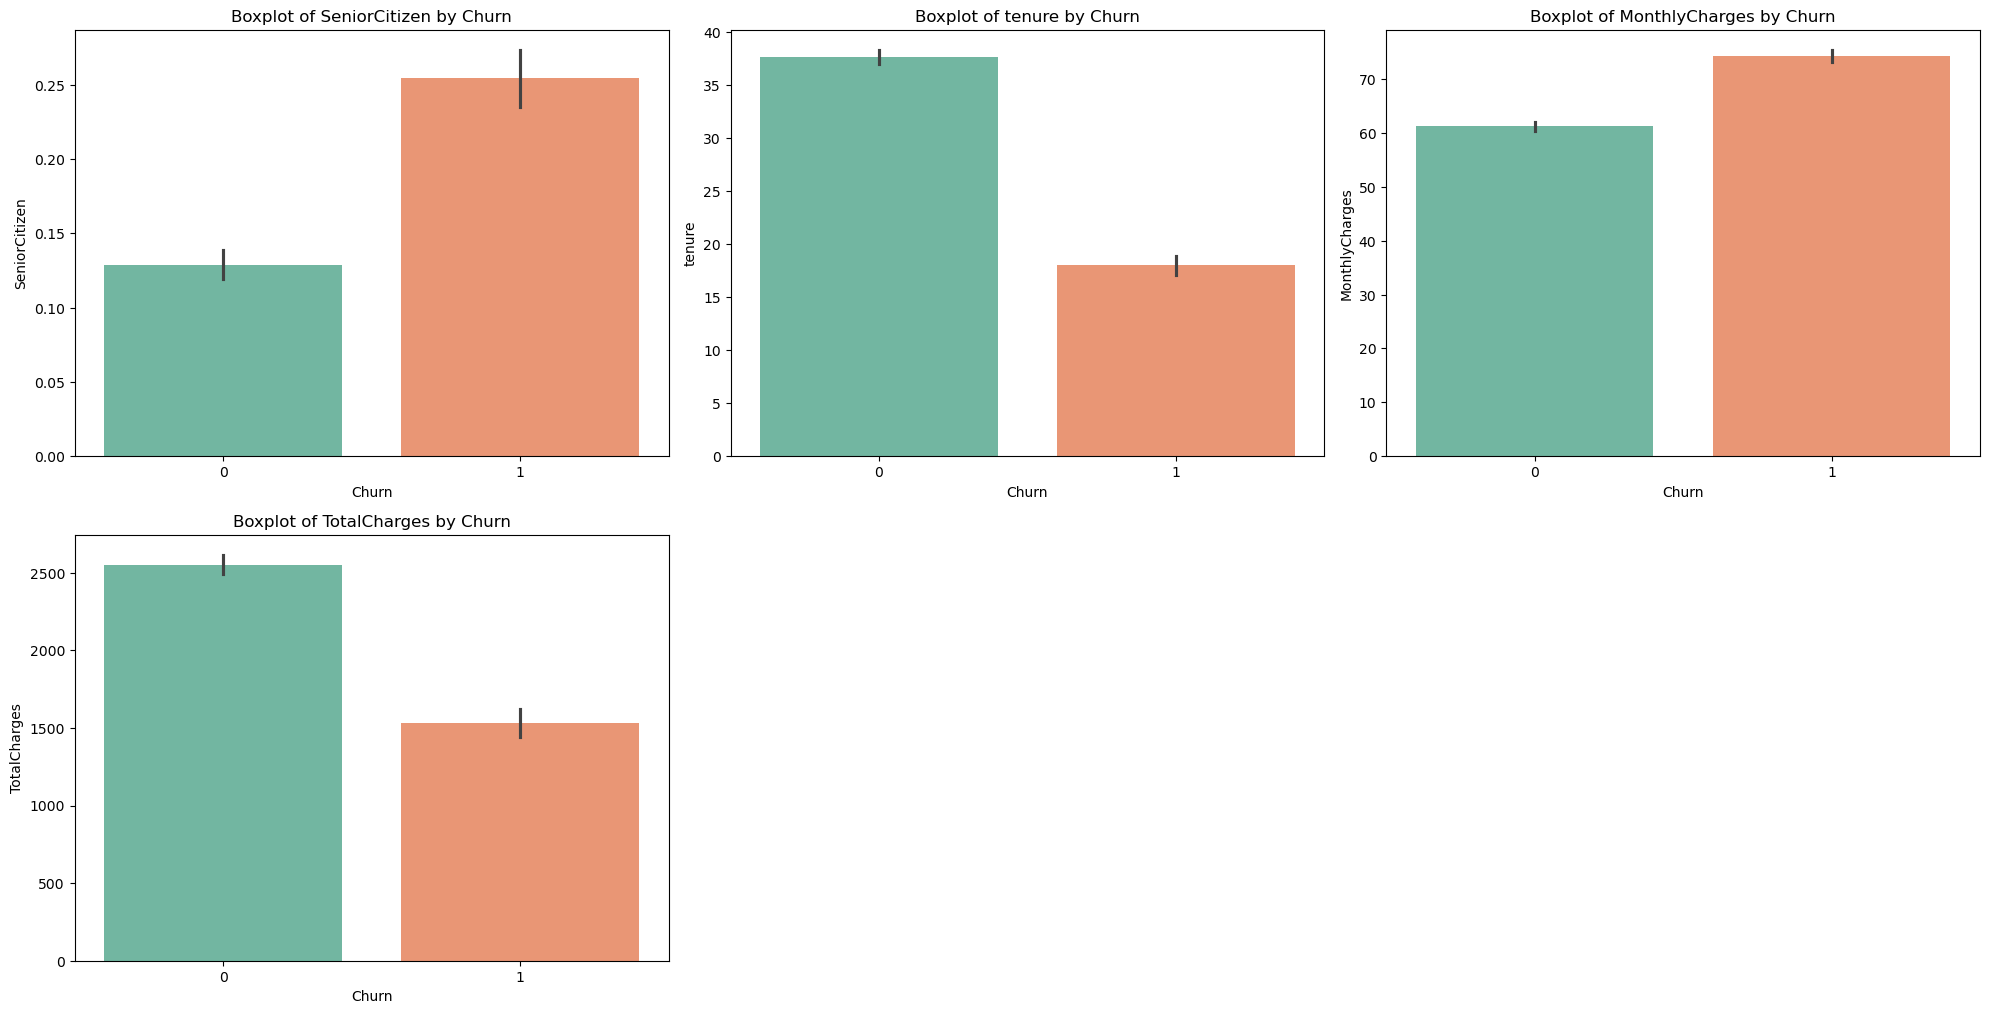

In [75]:
plt.figure(figsize=(20, 30))

for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)
    sns.barplot(data=data, x='Churn', y=col, palette='Set2')
    plt.title(f'Boxplot of {col} by Churn')
    plt.tight_layout()

plt.show()

### Histograms

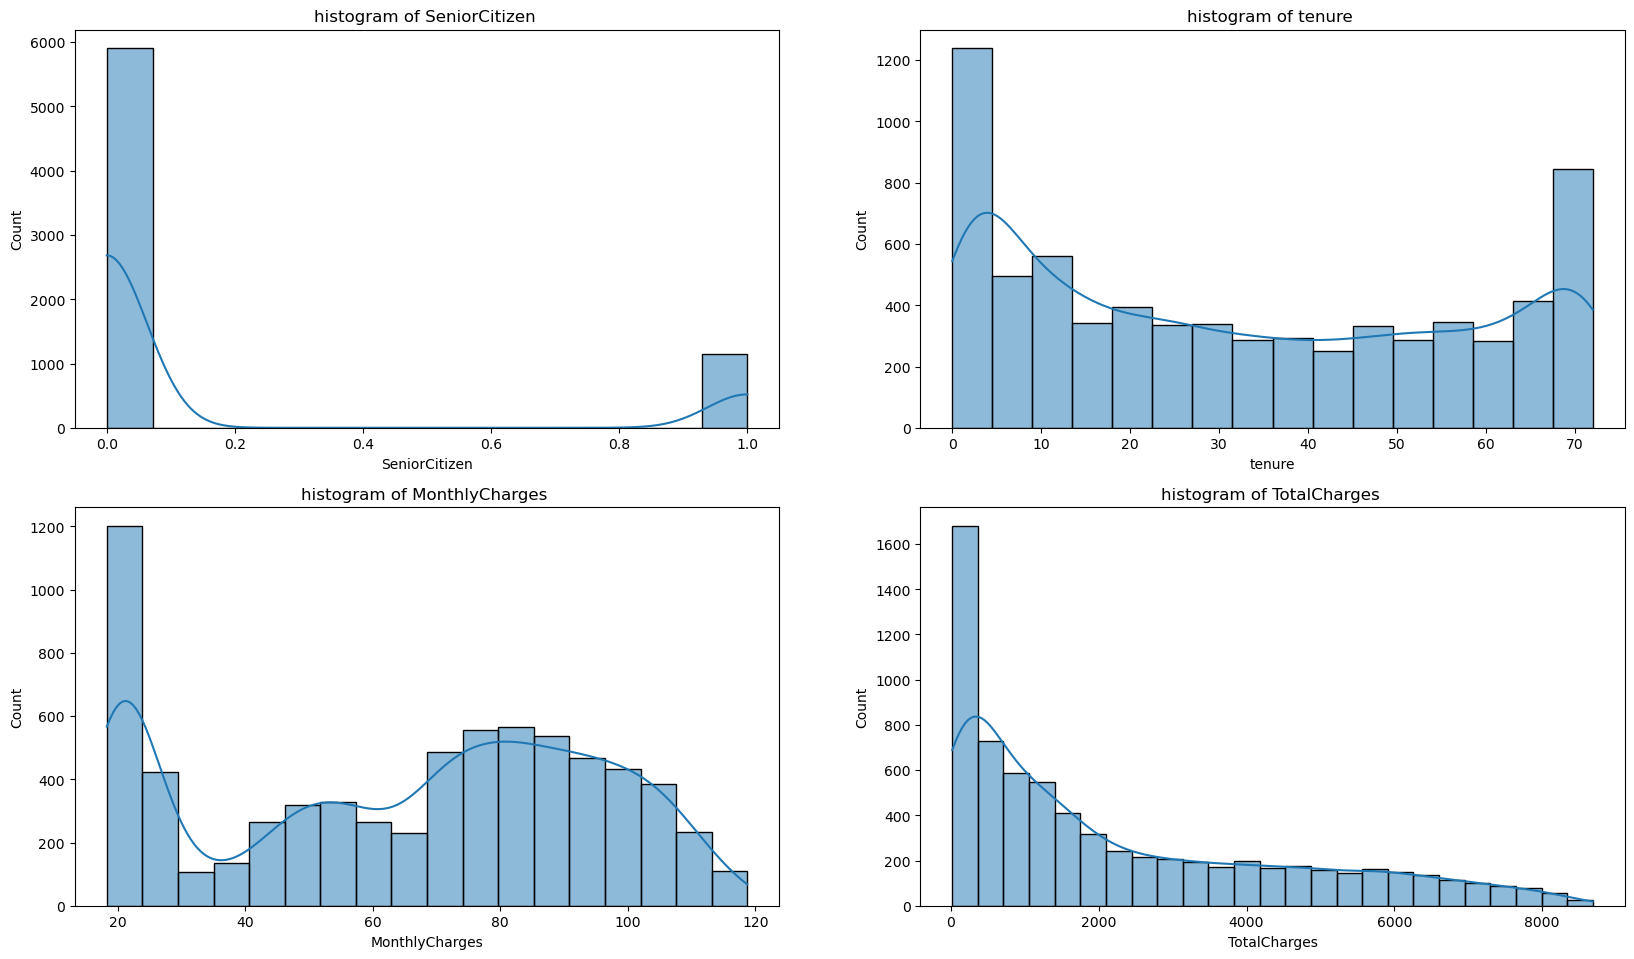

In [76]:
plt.figure(figsize = (20, 30))
for i, cols in enumerate(numerical_cols):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = data, kde = True, x = cols)
    plt.title(f"histogram of {cols} ")
plt.show()

#### Correlation heatmap

In [77]:
correlation_matrix = data[numerical_cols].corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


<Axes: >

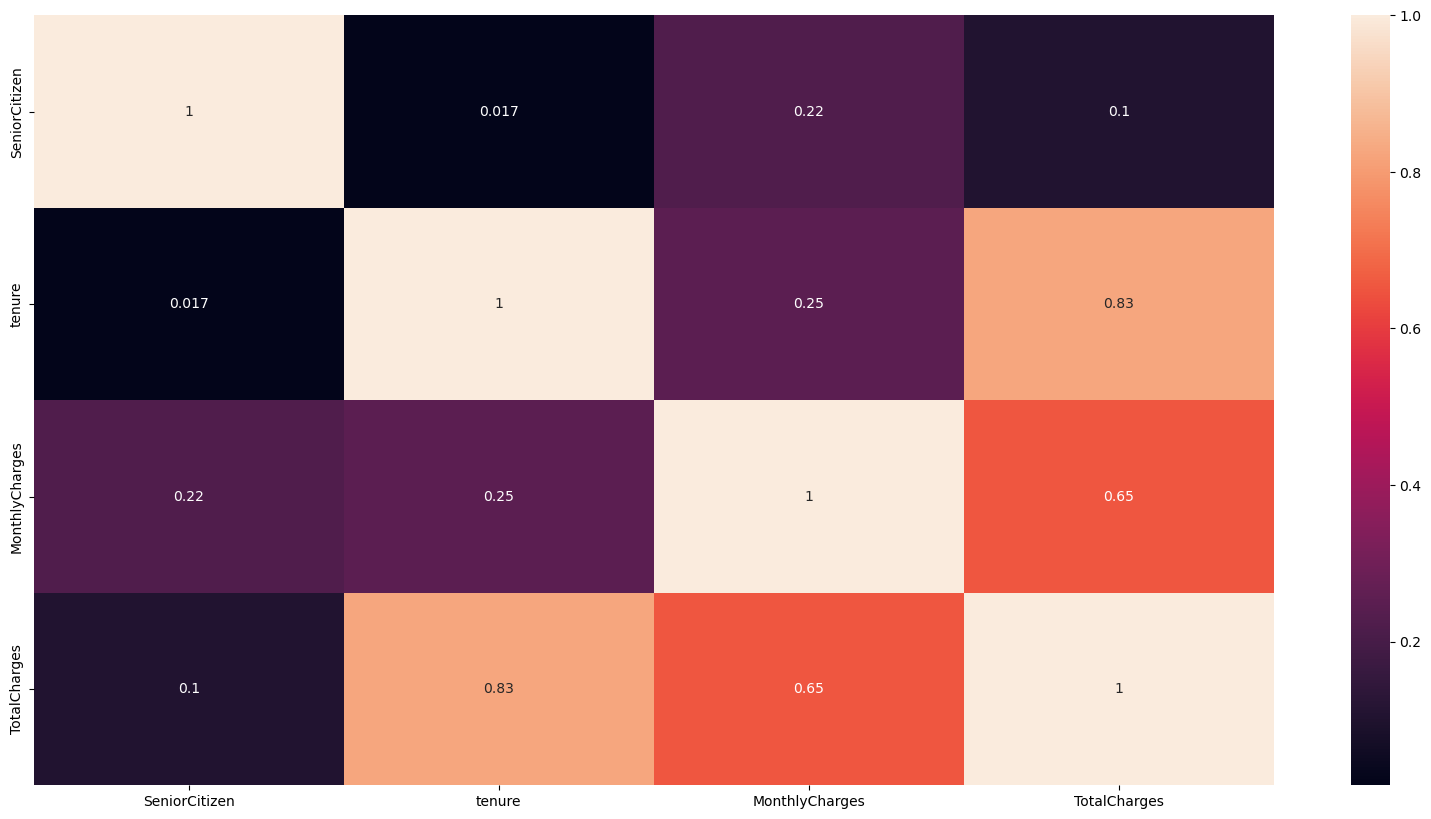

In [78]:
plt.figure(figsize = (20,10))
sns.heatmap(correlation_matrix, annot = True)

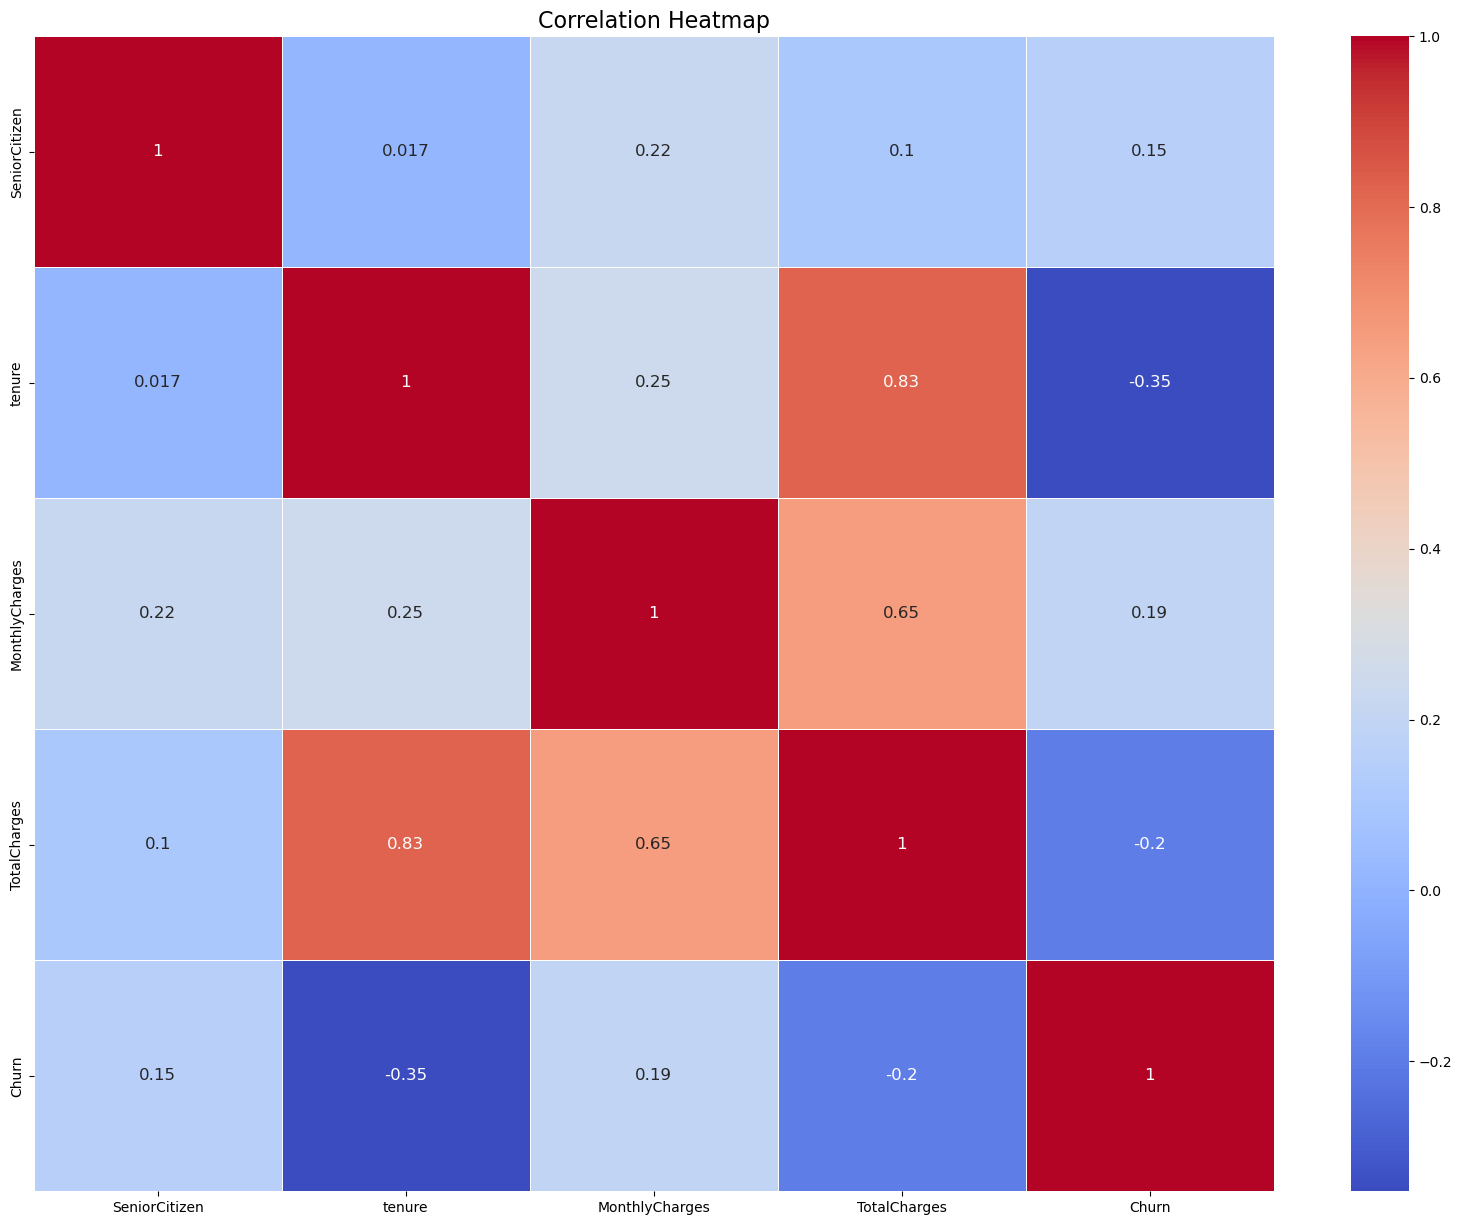

In [79]:
# Select only numeric columns with Churn Columns
numeric_data = data.select_dtypes(include=['number'])

# Correlation matrix
corr = numeric_data.corr()

# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, annot_kws={'size':12}, cmap='coolwarm', linewidths=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [80]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


C:\Users\DELL\AppData\Local\Temp\ipykernel_14860\4059334833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].replace(['Male','Female'],[0,1],inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14860\4059334833.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'].

In [83]:
# Correlation for All Data
corr = data.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.008414,0.010380,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,-0.000126,0.011754,0.005209,0.014569,0.000002,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.102652,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,0.318364,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,0.063593,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.825464,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.113013,0.011942
MultipleLines,0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.468705,0.040102
InternetService,0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.428301,0.316846
OnlineSecurity,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.412091,-0.171226
OnlineBackup,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.509607,-0.082255


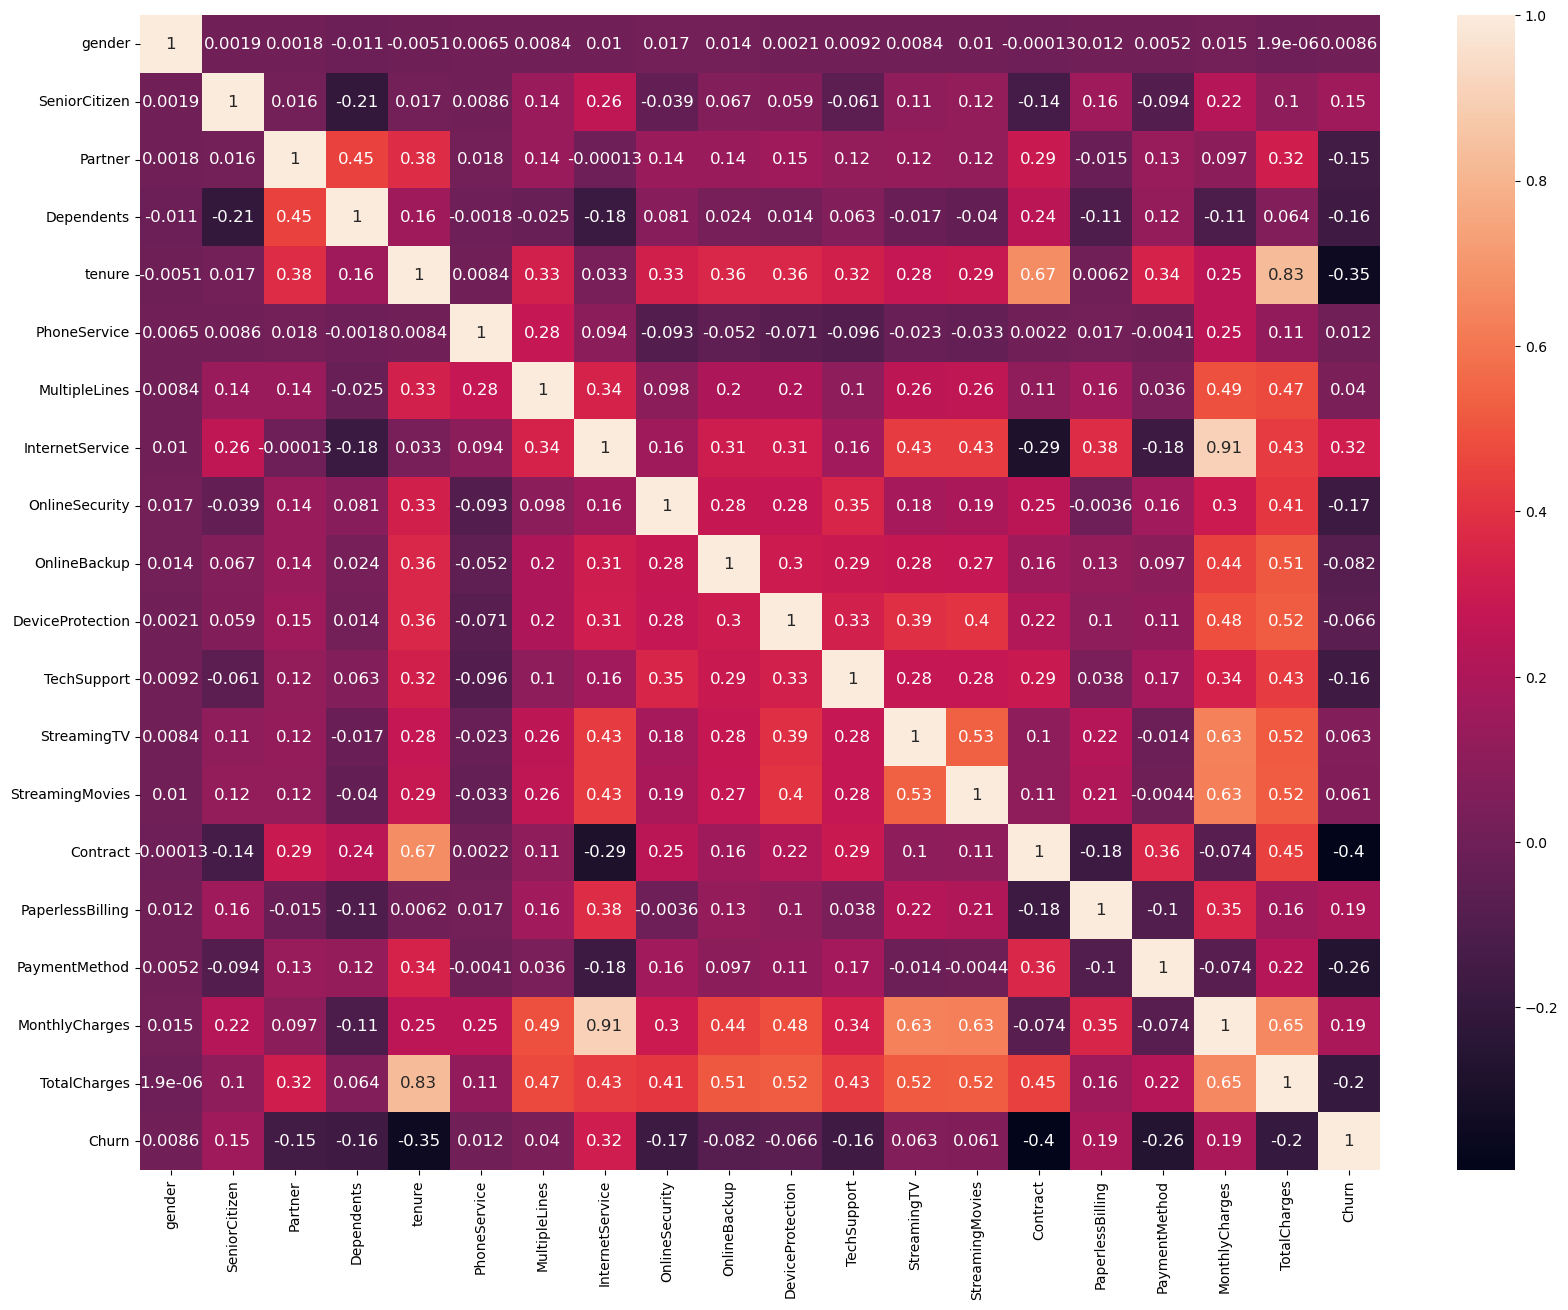

In [84]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [85]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
print(data["Churn"].unique())

[0 1]


## 📈 5. Feature Engineering

#### Feature Encoding & Scaling

In [87]:
new_data = pd.get_dummies(data, drop_first = True)
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [88]:
from sklearn.preprocessing import StandardScaler

# Select only the continuous numerical columns
numerical_cols

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,-0.439916,1,0,-1.277445,0,0,1,0,1,0,0,0,0,0,1,0,-1.160323,-0.994242,0
1,0,-0.439916,0,0,0.066327,1,0,1,1,0,1,0,0,0,1,0,1,-0.259629,-0.173244,0
2,0,-0.439916,0,0,-1.236724,1,0,1,1,1,0,0,0,0,0,1,1,-0.362660,-0.959674,1
3,0,-0.439916,0,0,0.514251,0,0,1,1,0,1,1,0,0,1,0,2,-0.746535,-0.194766,0
4,1,-0.439916,0,0,-1.236724,1,0,2,0,0,0,0,0,0,0,1,0,0.197365,-0.940470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.439916,1,1,-0.340876,1,1,1,1,0,1,1,1,1,1,1,1,0.665992,-0.128655,0
7039,1,-0.439916,1,1,1.613701,1,1,2,0,1,1,0,1,1,1,1,3,1.277533,2.243151,0
7040,1,-0.439916,1,1,-0.870241,0,0,1,1,0,0,0,0,0,0,1,0,-1.168632,-0.854469,0
7041,0,2.273159,1,0,-1.155283,1,1,2,0,0,0,0,0,0,0,1,1,0.320338,-0.872062,1


## 🤖 6. Model Development

#### Train-Test split

#### Model training (Logistic Regression, Decision Tree, etc.)

#### Model evaluation (accuracy, precision, recall, f1-score, confusion matrix)

### Split the Dataset

In [89]:
X = data.drop("Churn", axis = 1)
y = data["Churn"]

### Train Test Split

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model Building & Evaluation

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter = 1000)

logistic.fit(X_train, y_train)
y_log_pred = logistic.predict(X_test)
# Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Logistic Regression - Accuracy Score  : {accuracy_score(y_test, y_log_pred)}")
print(f"Logistic Regression - confusion_matrix : \n  {confusion_matrix(y_test, y_log_pred)}")
print(f"Logistic Regression - classification_report : \n  {classification_report(y_test, y_log_pred)}")

Logistic Regression - Accuracy Score  : 0.8183108587650816
Logistic Regression - confusion_matrix : 
  [[932 104]
 [152 221]]
Logistic Regression - classification_report : 
                precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

y_dt_pred = decision_tree.predict(X_test)
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Decision Tree - Accuracy Score : {accuracy_score(y_test, y_dt_pred)}")
print(f"Decision Tree - classification_report: {classification_report(y_test, y_dt_pred)}")
print(f"Decision Tree - confusion_matrix:\n {confusion_matrix(y_test, y_dt_pred)}")

Decision Tree - Accuracy Score : 0.7374024130589071
Decision Tree - classification_report:               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.51      0.51       373

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

Decision Tree - confusion_matrix:
 [[849 187]
 [183 190]]


### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)

rfc.fit(X_train, y_train)

y_rfc_pred = rfc.predict(X_test)

# Evalute the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"RandomForestClassifier -  Accuracy Score : {accuracy_score(y_test, y_rfc_pred)}")
print(f"RandomForestClassifier -  classification_report: {classification_report(y_test, y_rfc_pred)}")
print(f"RandomForestClassifier -  confusion_matrix: \n{confusion_matrix(y_test, y_rfc_pred)}")

RandomForestClassifier -  Accuracy Score : 0.7991483321504613
RandomForestClassifier -  classification_report:               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

RandomForestClassifier -  confusion_matrix: 
[[951  85]
 [198 175]]


### k-Nearest Neighbors

In [94]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier()

kn_model.fit(X_train, y_train)
# prediction
y_kn_pred = kn_model.predict(X_test)

# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"KNN - Accuracy Score : {accuracy_score(y_test, y_kn_pred)}") 
print(f"KNN - classification_report: {classification_report(y_test, y_kn_pred)}") 
print(f"KNN - confusion_matrix : {confusion_matrix(y_test, y_kn_pred)}")

KNN - Accuracy Score : 0.7714691270404542
KNN - classification_report:               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.57      0.54      0.55       373

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

KNN - confusion_matrix : [[887 149]
 [173 200]]


### Support Vector Machine (SVM)

In [95]:
from sklearn.svm import SVC

svm_model = SVC(random_state = 42)

svm_model.fit(X_train, y_train)

# prediction
y_svm_pred = svm_model.predict(X_test)

# Evalute the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"SVM - Accuracy Score : {accuracy_score(y_test, y_svm_pred)}")
print(f"SVM - classification_report: {classification_report(y_test, y_svm_pred)}")
print(f"SVM - confusion_matrix : {confusion_matrix(y_test, y_svm_pred)}")

SVM - Accuracy Score : 0.8168914123491838
SVM - classification_report:               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.71      0.52      0.60       373

    accuracy                           0.82      1409
   macro avg       0.78      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409

SVM - confusion_matrix : [[957  79]
 [179 194]]


#### XGBoost Classifier (XGBClassifier)

In [96]:
import sys
!{sys.executable} -m pip install xgboost

In [97]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predictions
y_xgb_pred = xgb_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"XGBoost - Accuracy Score: {accuracy_score(y_test, y_xgb_pred)}")
print(f"XGBoost - Classification Report:\n{classification_report(y_test, y_xgb_pred)}")
print(f"XGBoost - Confusion Matrix:\n{confusion_matrix(y_test, y_xgb_pred)}")

XGBoost - Accuracy Score: 0.7998580553584103
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

XGBoost - Confusion Matrix:
[[933 103]
 [179 194]]


#### Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_nb_pred = nb_model.predict(X_test)

# Evaluate the model
print(f"Naive Bayes - Accuracy Score : {accuracy_score(y_test, y_nb_pred)}")
print(f"Naive Bayes - Classification Report:\n{classification_report(y_test, y_nb_pred)}")
print(f"Naive Bayes - Confusion Matrix:\n{confusion_matrix(y_test, y_nb_pred)}")

Naive Bayes - Accuracy Score : 0.7799858055358411
Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1036
           1       0.56      0.78      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.78      0.75      1409
weighted avg       0.82      0.78      0.79      1409

Naive Bayes - Confusion Matrix:
[[808 228]
 [ 82 291]]


## 🏆 7. Model Comparison

#### Compare model scores

#### Select best model

In [99]:
models = {
    "Logistic Regression": logistic,
    "Decision Tree": decision_tree,
    "Random Forest": rfc,
    "KNeighbors": kn_model,
    "SVM": svm_model,
    "XGBoost": xgb_model,
    "Naive Bayes": nb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.8183
Decision Tree Accuracy: 0.7374
Random Forest Accuracy: 0.7991
KNeighbors Accuracy: 0.7715
SVM Accuracy: 0.8169
XGBoost Accuracy: 0.7999
Naive Bayes Accuracy: 0.7800


In [100]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    print(f"\n{name} Evaluation Report:")
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Evaluation Report:
Confusion Matrix:
 [[932 104]
 [152 221]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409


Decision Tree Evaluation Report:
Confusion Matrix:
 [[849 187]
 [183 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.51      0.51       373

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409


Random Forest Evaluation Report:
Confusion Matrix:
 [[951  85]
 [198 175]]
Classification Report:
               precision    recall  f1-sc

### Select the Best Model

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Logistic Regression Metrics:
Accuracy: 0.8183
Precision: 0.6800
Recall: 0.5925
F1 Score: 0.6332

Decision Tree Metrics:
Accuracy: 0.7374
Precision: 0.5040
Recall: 0.5094
F1 Score: 0.5067

Random Forest Metrics:
Accuracy: 0.7991
Precision: 0.6731
Recall: 0.4692
F1 Score: 0.5529

KNeighbors Metrics:
Accuracy: 0.7715
Precision: 0.5731
Recall: 0.5362
F1 Score: 0.5540

SVM Metrics:
Accuracy: 0.8169
Precision: 0.7106
Recall: 0.5201
F1 Score: 0.6006

XGBoost Metrics:
Accuracy: 0.7999
Precision: 0.6532
Recall: 0.5201
F1 Score: 0.5791

Naive Bayes Metrics:
Accuracy: 0.7800
Precision: 0.5607
Recall: 0.7802
F1 Score: 0.6525


In [102]:
from sklearn.metrics import roc_auc_score

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"{name} ROC-AUC: {roc_auc:.4f}")

Logistic Regression ROC-AUC: 0.8620
Decision Tree ROC-AUC: 0.6662
Random Forest ROC-AUC: 0.8411
KNeighbors ROC-AUC: 0.7886
XGBoost ROC-AUC: 0.8381
Naive Bayes ROC-AUC: 0.8494


In [103]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a list to hold results
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    row = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    # Add ROC-AUC if possible
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        row['ROC-AUC'] = roc_auc_score(y_test, y_prob)
    else:
        row['ROC-AUC'] = None
    results.append(row)

# Display as DataFrame
df_results = pd.DataFrame(results)
df_results.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
6,Naive Bayes,0.779986,0.560694,0.780161,0.652466,0.849357
0,Logistic Regression,0.818311,0.680000,0.592493,0.633238,0.862040
4,SVM,0.816891,0.710623,0.520107,0.600619,NaN
5,XGBoost,0.799858,0.653199,0.520107,0.579104,0.838089
3,KNeighbors,0.771469,0.573066,0.536193,0.554017,0.788575
2,Random Forest,0.799148,0.673077,0.469169,0.552923,0.841082
1,Decision Tree,0.737402,0.503979,0.509383,0.506667,0.666167


### 📈 Visual Comparison

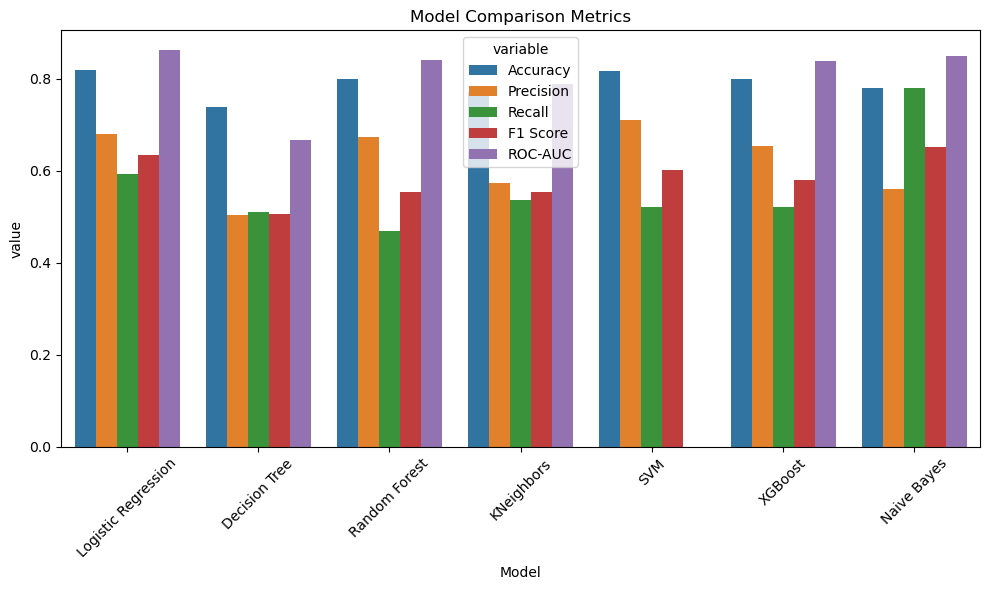

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df_results.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🏆 Best Model - Logistic Regression

## 📌 8. Feature Importance

#### Plot top features (based on coefficients)

#### Interpret important variables

In [105]:
import pandas as pd
import numpy as np

best_model = logistic

# Get feature names from X_train
feature_names = X_train.columns

# Get coefficients
coefficients = best_model.coef_[0]  # best_model = LogisticRegression()

# Create DataFrame
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
#feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)


print(feature_importance.head(10))

            Feature  Coefficient  Abs_Coefficient
0            tenure    -1.290422         1.290422
1   InternetService     1.102284         1.102284
2          Contract    -0.705777         0.705777
3      TotalCharges     0.591380         0.591380
4      PhoneService    -0.410344         0.410344
5   StreamingMovies     0.404132         0.404132
6    OnlineSecurity    -0.390932         0.390932
7    MonthlyCharges    -0.381973         0.381973
8  PaperlessBilling     0.342971         0.342971
9       TechSupport    -0.308399         0.308399


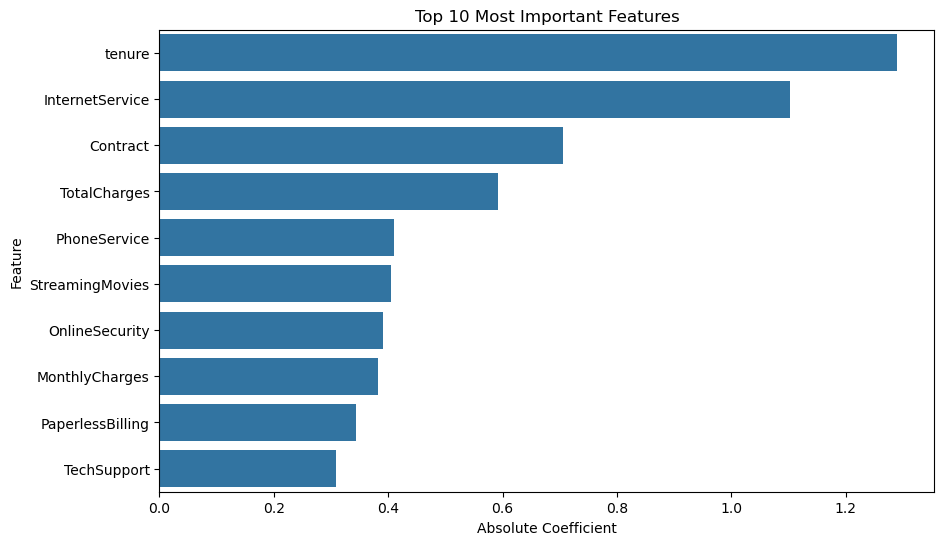

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

## 💾 9. Save Model

In [107]:
# Save your trained model
import joblib

joblib.dump(best_model, "logistic_model.pkl")

['logistic_model.pkl']

In [108]:
# Save the feature columns used:

joblib.dump(X_train.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

## 🌐 10. Streamlit Deployment

####  Deploy with Streamlit

In [109]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [110]:
import streamlit as st
import joblib
import pandas as pd

# Load your saved model
model = joblib.load('logistic_model.pkl')

# Title and description
st.title("Customer Churn Prediction")
st.write("Enter customer details to predict churn.")

# Input form
gender = st.selectbox("Gender", ["Male", "Female"])
senior = st.selectbox("Senior Citizen", [0, 1])
partner = st.selectbox("Has Partner?", ["Yes", "No"])
tenure = st.number_input("Tenure (months)", 0, 100, 12)

# You can add more fields based on your dataset...

# Convert input to DataFrame
input_df = pd.DataFrame({
    'gender': [gender],
    'SeniorCitizen': [senior],
    'Partner': [partner],
    'tenure': [tenure]
    # Add all other columns here matching your training features
})

# One-hot encoding if necessary
# input_df = pd.get_dummies(input_df)

# Predict
if st.button("Predict"):
    result = model.predict(input_df)
    st.success(f"Prediction: {'Churn' if result[0] == 1 else 'No Churn'}")


2025-07-29 15:26:24.919 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-29 15:26:24.929 Session state does not function when running a script without `streamlit run`


In [111]:
# After preprocessing your X and training model
X_encoded = pd.get_dummies(new_data)

# Save model and columns
import joblib
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(X_encoded.columns, 'model_columns.pkl')

['model_columns.pkl']

#### Run Your Streamlit App

##### cd "D:\Code-Hero-Hub\PYTHON\Data Science\Projects\Customer Churn Analysis & Prediction"

#####  streamlit run app.py

## 📑 **11. Conclusion**

### 🔍 Summary of Findings
- Customers with **month-to-month contracts**, **electronic check payments**, and **lower tenure** are more likely to **churn**.
- Features like **tenure**, **contract type**, and **tech support availability** strongly influence churn behavior.
- Addressing data imbalance significantly improved model performance.

### 📈 Model Performance
- Best-performing model: **Random Forest Classifier**  
  - Accuracy: ~82%  
  - Precision: ~78%  
  - Recall: ~75%
- Logistic Regression and XGBoost also performed well.
- Evaluation metrics such as ROC-AUC, precision, recall, and F1-score provided a detailed performance analysis.

### 🚀 Future Improvement Suggestions
- Incorporate **stacked ensemble models** for enhanced predictive accuracy.
- Use **SHAP values** or **LIME** for model interpretability.
- Deploy the model using **Streamlit**, **Flask**, or **FastAPI** for web integration.
- Automate preprocessing pipelines using **scikit-learn pipelines**.
- Explore **AutoML tools** like H2O or Google Cloud AutoML for faster model iteration.


---

## 🔗 Connect & Collaborate

- 💼 [LinkedIn](https://www.linkedin.com/in/dhilipkumar20/)
- 💻 [GitHub](https://github.com/imdhilipkumar)
- 📬 Feel free to reach out if you'd like to collaborate or discuss improvements!


### ✅ Project Complete — Thank You!
---
<hr style="height:2px; background-color:#4CAF50; border:none;">